In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv", index_col="id")
test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv", index_col="id")

In [3]:
sub_index = test.index

In [4]:
train['class'].loc[train['class']=='p']=1
train['class'].loc[train['class']=='e']=0

/tmp/ipykernel_18/2769642072.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train['class'].loc[train['class']=='p']=1
/tmp/ipykernel_18/2769642072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2077964 entries, 3116945 to 5194908
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 332.9+ MB


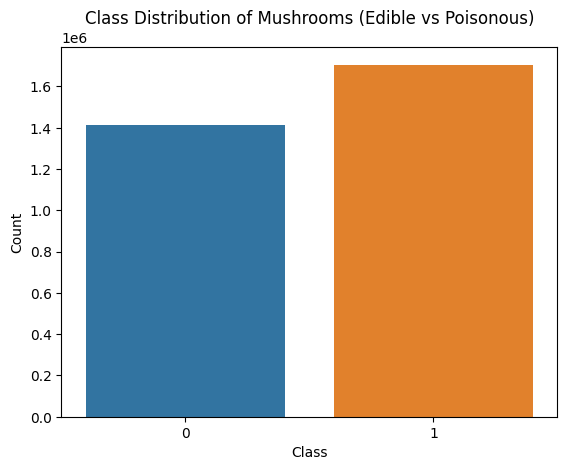

In [7]:
sns.countplot(x='class', data=train)
plt.title('Class Distribution of Mushrooms (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
y_actual = train['class']
train = train.drop('class', axis = 1)

In [9]:
train.head(2)

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
0,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w


In [10]:
missing = train.isnull().sum()
missing_percentage = missing/len(train)*100
total_unique_values = train[pd.notnull(train)].nunique()
missing_info = pd.DataFrame({
    'Class':train.columns,
    'Total_missing':missing,
    'Missing_percentage': missing_percentage,
    'Unique_features_not_null':total_unique_values
})
missing_info

,Class,Total_missing,Missing_percentage,Unique_features_not_null
cap-diameter,cap-diameter,4,0.000128,3913
cap-shape,cap-shape,40,0.001283,74
cap-surface,cap-surface,671023,21.528227,83
cap-color,cap-color,12,0.000385,78
does-bruise-or-bleed,does-bruise-or-bleed,8,0.000257,26
gill-attachment,gill-attachment,523936,16.809280,78
gill-spacing,gill-spacing,1258435,40.373988,48
gill-color,gill-color,57,0.001829,63
stem-height,stem-height,0,0.000000,2749
stem-width,stem-width,0,0.000000,5836


In [11]:
missing = test.isnull().sum()
missing_percentage = missing/len(test)*100
total_unique_values = test[pd.notnull(test)].nunique()
test_missing_info = pd.DataFrame({
    'Class':test.columns,
    'Total_missing':missing,
    'Missing_percentage': missing_percentage,
    'Unique_features_not_null':total_unique_values
})
test_missing_info

,Class,Total_missing,Missing_percentage,Unique_features_not_null
cap-diameter,cap-diameter,7,0.000337,3745
cap-shape,cap-shape,31,0.001492,62
cap-surface,cap-surface,446904,21.506821,59
cap-color,cap-color,13,0.000626,57
does-bruise-or-bleed,does-bruise-or-bleed,10,0.000481,22
gill-attachment,gill-attachment,349821,16.834796,66
gill-spacing,gill-spacing,839595,40.404694,35
gill-color,gill-color,49,0.002358,56
stem-height,stem-height,1,0.000048,2664
stem-width,stem-width,0,0.000000,5610


In [12]:
df1 = missing_info
df2 = test_missing_info
df = pd.concat([df1, df2], axis = 1)
df

,Class,Total_missing,Missing_percentage,Unique_features_not_null,Class,Total_missing,Missing_percentage,Unique_features_not_null
cap-diameter,cap-diameter,4,0.000128,3913,cap-diameter,7,0.000337,3745
cap-shape,cap-shape,40,0.001283,74,cap-shape,31,0.001492,62
cap-surface,cap-surface,671023,21.528227,83,cap-surface,446904,21.506821,59
cap-color,cap-color,12,0.000385,78,cap-color,13,0.000626,57
does-bruise-or-bleed,does-bruise-or-bleed,8,0.000257,26,does-bruise-or-bleed,10,0.000481,22
gill-attachment,gill-attachment,523936,16.809280,78,gill-attachment,349821,16.834796,66
gill-spacing,gill-spacing,1258435,40.373988,48,gill-spacing,839595,40.404694,35
gill-color,gill-color,57,0.001829,63,gill-color,49,0.002358,56
stem-height,stem-height,0,0.000000,2749,stem-height,1,0.000048,2664
stem-width,stem-width,0,0.000000,5836,stem-width,0,0.000000,5610


In [13]:
def large_missing_handler(df , df1):
    indexes = df1.loc[df1['Missing_percentage']>10].index
    df[df[indexes].isnull()]='L'
    return df
train = large_missing_handler(train , missing_info)
test = large_missing_handler(test ,test_missing_info)

In [14]:
categorical_cols = categorical_cols = train.select_dtypes('object').columns
for col in categorical_cols:
    mode = train[col].mode()[0]
    train.loc[train[col].isnull(), col]= mode
    test.loc[test[col].isnull(),col]= mode

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   cap-diameter          float64
 1   cap-shape             object 
 2   cap-surface           object 
 3   cap-color             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-root             object 
 11  stem-surface          object 
 12  stem-color            object 
 13  veil-type             object 
 14  veil-color            object 
 15  has-ring              object 
 16  ring-type             object 
 17  spore-print-color     object 
 18  habitat               object 
 19  season                object 
dtypes: float64(3), object(17)
memory usage: 499.4+ MB


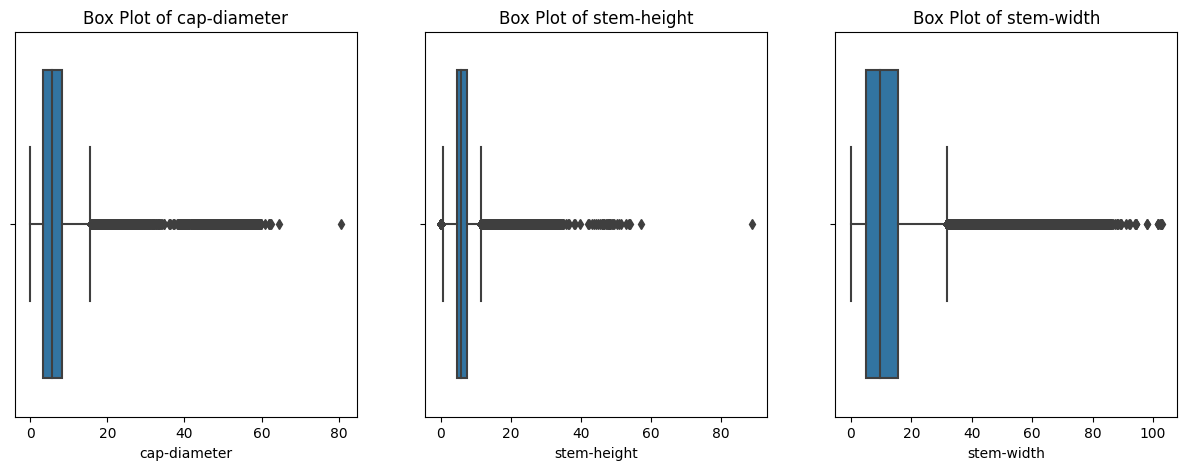

In [16]:
numerical_columns  = train.select_dtypes('float64').columns
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=train[column])
    plt.title(f'Box Plot of {column}')
plt.show()

In [17]:
for i in numerical_columns:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    median_to_impute = train[((train[i]>=Q1-1.5*IQR ) | (train[i]<=Q3+1.5*IQR ))][i].median()
    train.loc[((train[i]<Q1-1.5*IQR ) | (train[i]>Q3+1.5*IQR )),i] = median_to_impute
    median_to_impute = test[((test[i]>=Q1-1.5*IQR ) | (test[i]<=Q3+1.5*IQR ))][i].median()
    test.loc[((test[i]<Q1-1.5*IQR ) | (test[i]>Q3+1.5*IQR )),i] = median_to_impute
    
    

In [18]:
def rare_encoding(df, threshold=0.01):
    for column in df.select_dtypes(include='object').columns:
        if column in df.columns:
            freq = df[column].value_counts(normalize=True)
            rare_classes = freq.index[freq < threshold]
            df[column] = df[column].where(~df[column].isin(rare_classes), 'Rare')
    return df


train = rare_encoding(train)
test  = rare_encoding(test)

common_cols = train.columns.intersection(test.columns)
train = train[common_cols]
test = test[common_cols]

In [19]:
def encode_categorical(df, target_column=None, max_unique_classes=10):
    for column in df.select_dtypes(include='object').columns:
        unique_classes = df[column].nunique()
        if unique_classes <= max_unique_classes:
            df = pd.get_dummies(df, columns=[column], drop_first=True)
        else:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df


train = encode_categorical(train)
test = encode_categorical(test)

common_cols = train.columns.intersection(test.columns)
train = train[common_cols]
test = test[common_cols]

In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(train)
X_test = imputer.transform(test)


In [21]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    max_depth=10,n_estimators=10
)

In [22]:
import numpy as np
y_actual = np.asarray(y_actual)
X_train = np.asarray(X_train)

In [23]:
xgb_model.fit(X_train, y_actual)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [24]:
a = xgb_model.predict(np.asarray(X_test))

In [25]:
l = ['p' if(i==1) else 'e' for i in a ]

In [26]:
submission = pd.DataFrame({
    'id':sub_index,
    'class':l
})

In [27]:
submission.to_csv('ans.csv', index = False)